In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google_play_scraper import app, Sort, reviews_all

# Scraping reviews of Zomato from Google playstore

In [2]:
# Define and configure Google Play Scraper library
users_reviews = reviews_all(
    'com.application.zomato',
    sleep_milliseconds=0,
    lang='en', 
    country='in', 
    sort=Sort.NEWEST, # Default is Sort.MOST_RELEVANT.
)

In [3]:
# Convert collected reviews data into dataframe
df_reviews = pd.DataFrame(np.array(users_reviews),columns=['review'])
df_reviews = df_reviews.join(pd.DataFrame(df_reviews.pop('review').tolist()))
# Display dataframe header
df_reviews.head()

In [4]:
df_reviews

In [5]:
df_reviews.head(5)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,225e211c-a133-4c2b-af3f-4db642b12553,Jaspreet6248@gmail.com Jaspreet,https://play-lh.googleusercontent.com/a/AItbvm...,Gud,5,0,16.5.7,07-07-2022 19:23,NaN,NaN
1,94b74826-b3c6-40e3-bd60-2db6e4473d07,Muhammed Abdullah,https://play-lh.googleusercontent.com/a-/AFdZu...,High rates,1,0,16.5.2,07-07-2022 19:22,"Hi there, 'taxes & charges' include delivery f...",12-06-2022 21:14
2,f80c862e-b827-430c-a573-f7509fb37782,Anil Koul,https://play-lh.googleusercontent.com/a-/AFdZu...,It took 1.5 hours to cover a distance of 1 km ...,1,0,16.5.7,07-07-2022 19:22,NaN,NaN
3,86f29e3f-391f-406b-897e-86af59cf6218,anu radhakrishnan,https://play-lh.googleusercontent.com/a/AItbvm...,Nice,5,0,16.2.2,07-07-2022 19:20,NaN,NaN
4,649c3f8e-f50e-4845-9ca9-007aa8f1442a,Simran Kaur,https://play-lh.googleusercontent.com/a-/AFdZu...,V good app,4,0,16.5.7,07-07-2022 19:18,NaN,NaN


In [6]:
# Check dataframe information
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438795 entries, 0 to 438794
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              438795 non-null  object
 1   userName              438795 non-null  object
 2   userImage             438795 non-null  object
 3   content               438791 non-null  object
 4   score                 438795 non-null  int64 
 5   thumbsUpCount         438795 non-null  int64 
 6   reviewCreatedVersion  372967 non-null  object
 7   at                    438795 non-null  object
 8   replyContent          226781 non-null  object
 9   repliedAt             226781 non-null  object
dtypes: int64(2), object(8)
memory usage: 33.5+ MB


In [7]:
# Count number of review scores
df_reviews['score'].value_counts()

5    237403
1    134587
4     41308
3     13977
2     11520
Name: score, dtype: int64

##### There are 237403 reviews with 5 star rating and 11520 with low ratings

<AxesSubplot:ylabel='score'>

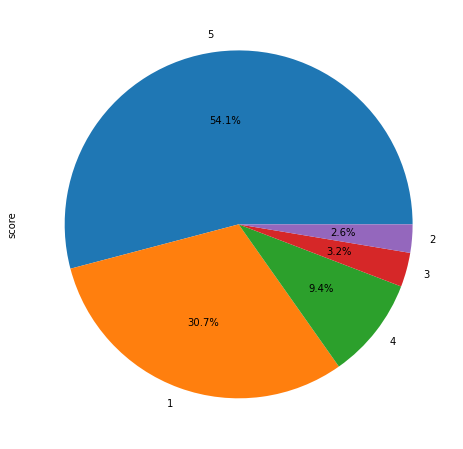

In [8]:
# Visualizing the  review scores as pie chart
df_reviews['score'].value_counts().plot(kind='pie',figsize=(10,8), autopct='%1.1f%%')

#### People who rated 5 are 54.1%
#### People who rated 4 are 9.4%
#### People who rated 3 are 3.2%
#### People who rated 2 are 2.6%
#### People who rated 1 are 30.7%

In [9]:
# Create new dataframe with review content and score for further analysis
df_reviews_content = pd.DataFrame(df_reviews, columns=['content','score'])

In [10]:
# Display new dataframe header
df_reviews_content.head()

,content,score
0,Gud,5
1,High rates,1
2,It took 1.5 hours to cover a distance of 1 km ...,1
3,Nice,5
4,V good app,4


# Analzing with Azure Text Analysis 

In [11]:
# Import necessary libraries
from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential

In [12]:
# Define the service key and endpoint of Azure Text Analytics
key = "your key "
endpoint = "your endpoint"

In [13]:
# Configure Azure Text Analytics client library
ta_credential = AzureKeyCredential(key)
text_analytics_client = 
TextAnalyticsClient(
        endpoint=endpoint, 
        credential=ta_credential)
client = text_analytics_client

reviews_content_sentiment = []


In [14]:

# Pass review content to Azure Text Analytics and collect sentiment result
for index, headers in df_reviews_content.iterrows():
    
    reviews_content = str(headers['content'])
    print("Review Content: {}".format(reviews_content))
    
    documents = [reviews_content]
    response = client.analyze_sentiment(documents=documents)[0]
    sentiment = response.sentiment
    print("Content Sentiment: {}".format(sentiment))
    
    reviews_score = str(headers['score'])
    print("Review Content Sentiment Score: {}".format(reviews_score))
    
    reviews_content_sentiment.append([reviews_content, sentiment, reviews_score])


In [16]:
# Convert collected news headers with sentiment to Pandas dataframes.
reviews_sentiment = pd.DataFrame(reviews_content_sentiment, columns=['content','sentiment','reviews_score'])

In [17]:
reviews_sentiment

In [18]:
reviews_sentiment.head()

,content,sentiment,reviews_score
0,Gud,neutral,5
1,High rates,neutral,1
2,It took 1.5 hours to cover a distance of 1 km ...,negative,1
3,Nice,positive,5
4,V good app,positive,4


In [19]:
# Count number of review content sentiment
reviews_sentiment['sentiment'].value_counts()

positive    2125
neutral     1736
negative     471
mixed         75
Name: sentiment, dtype: int64

<AxesSubplot:ylabel='content'>

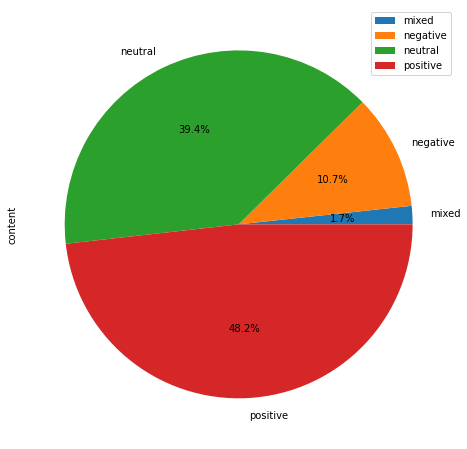

In [20]:
# Visualize review content sentiment as pie chart.
reviews_sentiment.groupby(['sentiment']).count().plot(kind='pie', y='content', figsize=(8,8), autopct='%1.1f%%')

##### Grouping and analyzing the reviews with respect to the rating they provided.

In [21]:
# Group by sentiment & reviews_score
reviews_sentiment.groupby(["sentiment", "reviews_score"])["content"].count()

sentiment  reviews_score
mixed      1                  48
           2                   8
           3                   8
           4                   4
           5                   7
negative   1                 394
           2                  30
           3                  19
           4                  10
           5                  18
neutral    1                 910
           2                  91
           3                  78
           4                  83
           5                 574
positive   1                 255
           2                  43
           3                  77
           4                 264
           5                1486
Name: content, dtype: int64

##### The highest sentiment are of positive with score rating of 5 stars, followed by neutral  and negative.

<AxesSubplot:xlabel='sentiment'>

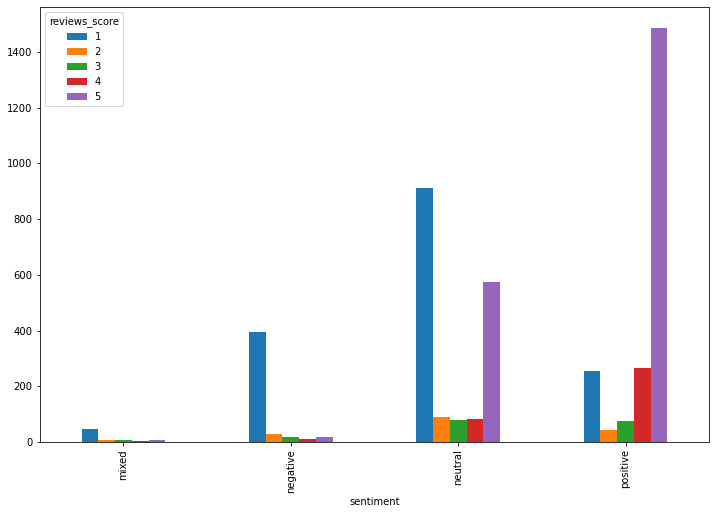

In [22]:
# Visual sentiment & reviews_score as bar chart
pd.crosstab(reviews_sentiment['sentiment'],reviews_sentiment['reviews_score']).plot.bar(figsize=(12,8))

In [23]:
# Check dataframe information
reviews_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4407 entries, 0 to 4406
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        4407 non-null   object
 1   sentiment      4407 non-null   object
 2   reviews_score  4407 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 103.4+ KB


In [24]:
# Create new dataframe to perform factorization
reviews_sentiment_factorized = reviews_sentiment.copy()

In [25]:
# Perform factorization for sentiment column
reviews_sentiment_factorized.sentiment = pd.factorize(reviews_sentiment_factorized.sentiment)[0]

# Convert reviews_score column data type to intager
reviews_sentiment_factorized['reviews_score'] = reviews_sentiment_factorized['reviews_score'].astype(int)



In [26]:
# Check dataframe information
reviews_sentiment_factorized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4407 entries, 0 to 4406
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        4407 non-null   object
 1   sentiment      4407 non-null   int64 
 2   reviews_score  4407 non-null   int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 86.2+ KB


In [27]:
# Group by sentiment (factorized) & reviews_score
reviews_sentiment_factorized.groupby(["sentiment", "reviews_score"])["content"].count()

sentiment  reviews_score
0          1                 910
           2                  91
           3                  78
           4                  83
           5                 574
1          1                 394
           2                  30
           3                  19
           4                  10
           5                  18
2          1                 255
           2                  43
           3                  77
           4                 264
           5                1486
3          1                  48
           2                   8
           3                   8
           4                   4
           5                   7
Name: content, dtype: int64

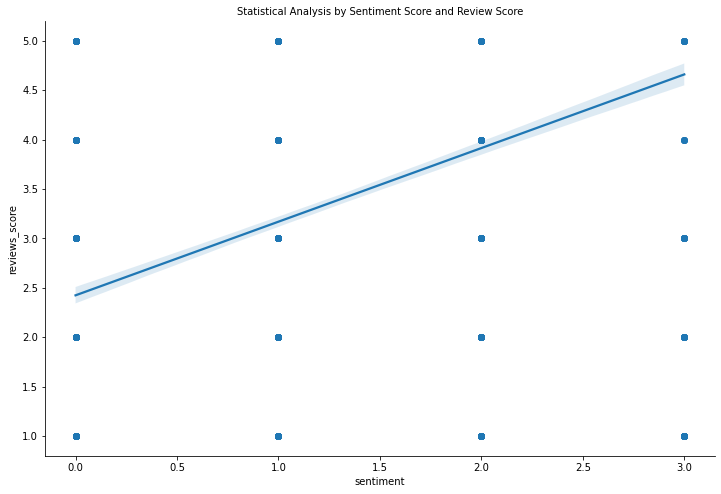

In [28]:
# Plotting sentiment & reviews_score columns relationship by Seaborn.
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
plt.title('Statistical Analysis by Sentiment Score and Review Score', fontsize=10)
sns.regplot(x='sentiment', y= 'reviews_score', data=reviews_sentiment_factorized)
sns.despine()

Data Analysis from Visualization

Positive sentiment (2) from review content is trending to higher reivew score around 4 to 5.

Negative sentiment (1) from review content is trending to lower review score.

Neutral sentiment (0) from review content is trending to lowest review score.

In other word, lower review score is trending to Neutral sentiment(0).


The review Score are totally dependent on the sentiments, in this observation if the sentiments are from negative to neutral lower the score is.